### Merge Spotify and Grammy 

Import the libreries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Grammy Dataframe

Read CSV grammy

In [2]:
csv_file = 'grammynew.csv'
grammy_df = pd.read_csv(csv_file, sep=',', encoding='latin-1')
grammy_df.head()

,year,title,category,nominee,artist,workers,grammy_nominee
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney âDarkchildâ Jerkins, producer; Jose...",True
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


In the grammy DataFrame, there are a total of 4804 records and 7 columns.

In [3]:
grammy_df.shape

(4804, 7)

### Spotify Dataframe

Read CSV Spotify

In [4]:
csv_file2 = 'spotifynew.csv'
spotify_df = pd.read_csv(csv_file2, sep=',', encoding='latin-1')
spotify_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,num_artists,secondary_artist,popularity_category,genre_category
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.000001,0.3580,0.715,87.917,4,acoustic,1,No second artist,High,Acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.000006,0.1010,0.267,77.489,4,acoustic,1,No second artist,Medium,Acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.000000,0.1170,0.120,76.332,4,acoustic,2,ZAYN,Medium,Acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.000071,0.1320,0.143,181.740,3,acoustic,1,No second artist,High,Acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0.000000,0.0829,0.167,119.949,4,acoustic,1,No second artist,High,Acoustic


In the spotify DataFrame, there are a total of 89740 records and 23 columns.

In [5]:
spotify_df.shape

(89740, 23)

## MERGE

The merge() method in pandas combines two DataFrames (spotify_df and grammy_df) using the columns 'track_name' and 'nominee' as merge keys. A left join (how='left') is performed, retaining all rows of spotify_df and adding the corresponding rows of grammy_df according to the specified combination keys. This enriches the resulting DataFrame df with additional information from grammy_df based on the relationship between the selected columns.

In [6]:
df = spotify_df.merge(grammy_df, how='left', left_on='track_name', right_on='nominee')

After performing the merge operation, our new dataset contains 90,336 records and 30 columns.

In [7]:
df.shape

(90336, 30)

An overview of the new data set 

In [8]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,secondary_artist,popularity_category,genre_category,year,title,category,nominee,artist,workers,grammy_nominee
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,No second artist,High,Acoustic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,No second artist,Medium,Acoustic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,ZAYN,Medium,Acoustic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,No second artist,High,Acoustic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,No second artist,High,Acoustic,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90336 entries, 0 to 90335
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artists              90336 non-null  object 
 1   album_name           90336 non-null  object 
 2   track_name           90336 non-null  object 
 3   popularity           90336 non-null  int64  
 4   duration_ms          90336 non-null  int64  
 5   explicit             90336 non-null  bool   
 6   danceability         90336 non-null  float64
 7   energy               90336 non-null  float64
 8   key                  90336 non-null  int64  
 9   loudness             90336 non-null  float64
 10  mode                 90336 non-null  int64  
 11  speechiness          90336 non-null  float64
 12  acousticness         90336 non-null  float64
 13  instrumentalness     90336 non-null  float64
 14  liveness             90336 non-null  float64
 15  valence              90336 non-null 

 ### Transformation : Grammy Nominee column

We transform the 'winner' column into a binary column where 1 represents that the record corresponds to a nominee and 0 represents that it does not. This facilitates the use of this information in further analysis.

In [10]:
df['grammy_nominee'] = df['grammy_nominee'].notna().astype(int)

In the dataset we are analyzing, some columns such as  year, title, category, nominee, artist, and workers have null values. These null values may be the result of the merge process between different datasets, which may have generated incomplete records in these columns.

In [11]:
df.isnull().sum()

artists                    0
album_name                 0
track_name                 0
popularity                 0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre                0
num_artists                0
secondary_artist           2
popularity_category        0
genre_category             0
year                   87995
title                  87995
category               87995
nominee                87995
artist                 87995
workers                87995
grammy_nominee             0
dtype: int64

Since the year, title, category, nominee, artist and workers columns contain more than 97% of null values in our data set, it has been decided to eliminate these columns due to their lack of significant contribution to the subsequent analysis.

In [12]:
df.drop(columns=['year', 'title', 'category', 'nominee', 'artist', 'workers'], inplace=True)

In [13]:
df.isnull().sum()

artists                0
album_name             0
track_name             0
popularity             0
duration_ms            0
explicit               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
track_genre            0
num_artists            0
secondary_artist       2
popularity_category    0
genre_category         0
grammy_nominee         0
dtype: int64

### Transformation: Eliminate Null Values

We have eliminated these two null values since they do not have a significant impact on the data set.

In [14]:
df[df.isna().any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,liveness,valence,tempo,time_signature,track_genre,num_artists,secondary_artist,popularity_category,genre_category,grammy_nominee
37417,Angels of Liberty;N/A,Telepathine,Sophia,22,244095,False,0.324,0.955,1,-0.866,...,0.4130,0.358,146.570,4,goth,2,NaN,Low,Rock,0
37660,Angels of Liberty;N/A,Telepathine,Leda,21,278473,False,0.449,0.930,9,-1.085,...,0.0527,0.315,130.983,4,goth,2,NaN,Low,Rock,0


In [15]:
df.drop([37417, 37660], inplace=True)

Analysis of the chart shows that competition for the Grammy Awards is very high. Only a small fraction of artists are nominated for the awards, which means that success at the Grammys requires exceptional talent and considerable hard work. Several factors, such as the quality of the music, the popularity of the artist, critical acclaim and the promotional campaign, can influence the likelihood of being nominated for a Grammy.

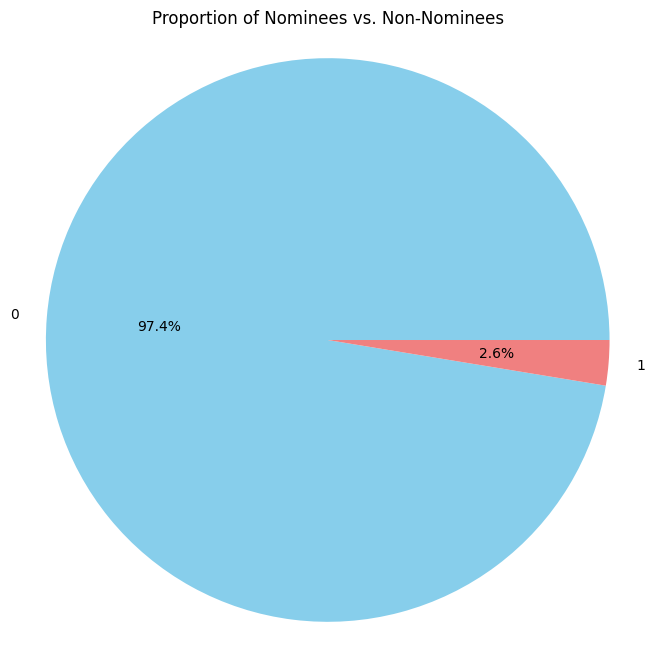

In [16]:
nominee_counts = df['grammy_nominee'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(nominee_counts, labels=nominee_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Nominees vs. Non-Nominees')
plt.axis('equal')
plt.show()


Analysis of the chart shows that Grammy success varies considerably among different genres of music. Pop, rock, country, R&B, rap and jazz have a higher Grammy success rate, while other genres such as electronic, classical and world have a lower success rate. Several factors, such as the popularity of the genre, competition within the genre, the genre's history of Grammy success and musical trends, can influence the likelihood of being nominated for a Grammy.

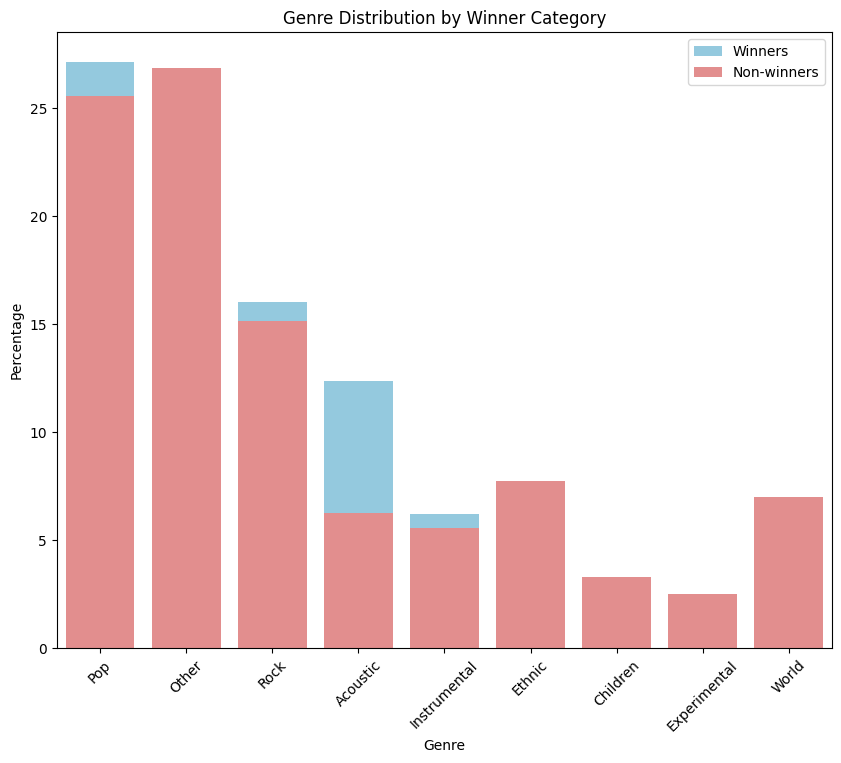

In [17]:
winners = df[df['grammy_nominee'] == 1]
non_winners = df[df['grammy_nominee'] == 0]

winners_genre_distribution = winners['genre_category'].value_counts(normalize=True) * 100
non_winners_genre_distribution = non_winners['genre_category'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 8))
sns.barplot(x=winners_genre_distribution.index, y=winners_genre_distribution.values, color='skyblue', label='Winners')
sns.barplot(x=non_winners_genre_distribution.index, y=non_winners_genre_distribution.values, color='lightcoral', label='Non-winners')
plt.title('Genre Distribution by Winner Category')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(rotation=45)
plt.show()


The chart analysis shows that achieving a large number of Grammy nominations is an exceptional achievement that requires talent, hard work and dedication. Artists such as Lady Gaga, ABBA, Elvis Presley, Adele have proven to be iconic figures in the music industry by accumulating a large number of nominations at this prestigious award show

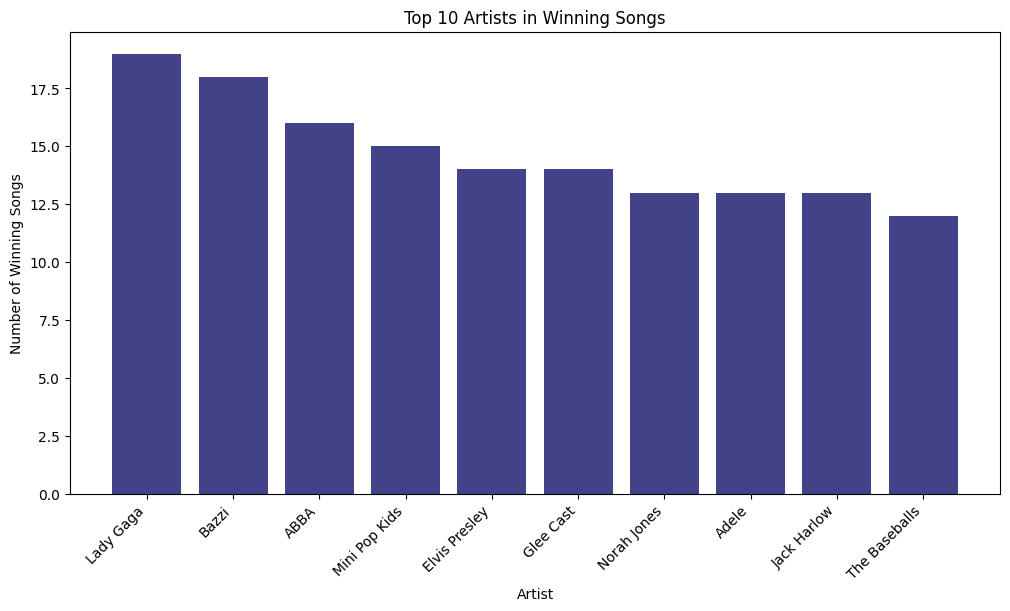

In [18]:
winning_artists = df[df['grammy_nominee'] == 1]['artists'].value_counts()
top_winning_artists = winning_artists.head(10)

values = top_winning_artists.values
labels = top_winning_artists.index

color_index = 50 
color = plt.cm.viridis(color_index)


plt.figure(figsize=(12, 6))
bars = plt.bar(labels, values, color=color)
plt.title('Top 10 Artists in Winning Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Winning Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
winners = df[df['grammy_nominee'] == 1]

winning_artists_frequency = winners['artists'].value_counts().head(10)

top_winning_artists_table = pd.DataFrame({
    'Artist': winning_artists_frequency.index,
    'Frequency in Nominee Songs': winning_artists_frequency.values
})

top_winning_artists_table


,Artist,Frequency in Nominee Songs
0,Lady Gaga,19
1,Bazzi,18
2,ABBA,16
3,Mini Pop Kids,15
4,Elvis Presley,14
5,Glee Cast,14
6,Norah Jones,13
7,Adele,13
8,Jack Harlow,13
9,The Baseballs,12


In [20]:
df.to_csv('merge.csv', index=False)